In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
import scipy

## Importing cleaned Dataset - 'FK_Friday_Fixed_Heading.csv'

In [2]:
#Dataset importing and display head section

dataset = pd.read_csv('FK_Friday_Fixed_Heading.csv')
dataset.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


# Converting output variables to binary digits

In [3]:
#Converting classification variables to digits
# BENIGN to 0 and Bot to 1

def con_to_binary(x):
    if x=='BENIGN':
        return 0
    if x=='Bot':
        return 1
    
dataset['Label'] = dataset['Label'].apply(con_to_binary)

In [4]:
dataset.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,0
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [5]:
dataset.shape

(191033, 78)

## Selecting the top ten features which are extracted from Random Forest classifier

1. BwdPacketLengthMean
2. Init_Win_bytes_forward
3. AvgBwdSegmentSize
4. Init_Win_bytes_backward
5. AveragePacketSize
6. TotalLengthofBwdPackets
7. SubflowBwdBytes
8. BwdPackets/s
9. PacketLengthMean
10. BwdPacketLengthMax

In [6]:
#creating a dataframe to select the data containing above features and 'Label' column (target variable)

df =dataset[['BwdPacketLengthMean','Init_Win_bytes_forward', 'AvgBwdSegmentSize','Init_Win_bytes_backward','AveragePacketSize','TotalLengthofBwdPackets','SubflowBwdBytes','BwdPackets/s','PacketLengthMean','BwdPacketLengthMax','Label']]

In [7]:
df.head()

,BwdPacketLengthMean,Init_Win_bytes_forward,AvgBwdSegmentSize,Init_Win_bytes_backward,AveragePacketSize,TotalLengthofBwdPackets,SubflowBwdBytes,BwdPackets/s,PacketLengthMean,BwdPacketLengthMax,Label
0,72.0,377,72.0,2079,166.729167,1152,1152,0.141919,163.326531,72,0
1,316.0,955,316.0,2079,248.062500,5056,5056,0.141919,243.000000,316,0
2,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0,0
3,0.0,-1,0.0,-1,29.272727,0,0,0.000000,28.000000,0,0
4,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0,0


In [8]:
df.shape

(191033, 11)

#### The above number of rows - 191033 from 'df' is matching with actual 'dataset' 

## Defining dependent and independent variables

In [9]:
#Assigning X as independent variable and y as target variable

X = df.drop(columns='Label')
y = df.iloc[:,10]

#Checking the shape of X and y variables

print(X.shape)
print(y.shape)

(191033, 10)
(191033,)


### Checking the count of target variables - 0 and 1

In [10]:
df.Label.value_counts()

0    189067
1      1966
Name: Label, dtype: int64

## Handling imbalanced dataset using SMOTETomek method for balancing the target variables
## This will perform over-sampling using SMOTE and cleaning using Tomek links.

In [11]:
# Implementing SMOTETomek method with random state as '123'and fitting this to X and y variables 

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
X_res,y_res=smk.fit_sample(X,y)

Using TensorFlow backend.


In [12]:
#Shapes of original data
(X.shape), (y.shape)

((191033, 10), (191033,))

In [13]:
#Shapes of resampled data after applying SMOTETomek
(X_res.shape), (y_res.shape)

((377886, 10), (377886,))

## The below result shows we got equal number of target variable classifiers

In [14]:
#Count of y_res for Benign:0 and Bot:1 after resampling  

from collections import Counter
print('Number of classified rows in y_res {}'.format(Counter(y_res)))

Number of classified rows in y_res Counter({0: 188943, 1: 188943})


## RandomSearchCV application for tuning best parameters using XGBoost classifier

In [15]:
#Importing Randomsearch cross validation
from sklearn.model_selection import RandomizedSearchCV

In [16]:
#Assigning variable to XGB Classifier
import xgboost as xgb
classifier=xgb.XGBClassifier()

## Hyperparameter tuning 

In [17]:
#Hyperparameter optimization

parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 18, 20],
 "min_child_weight" : [ 1, 3, 5, 7, 8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9 ]   
}

In [18]:
#Providing XGBoost classifier to random search cross validation for selecting best parameters
#Choose 'recall' considering the fact to evaluate false negatives  

random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='recall',n_jobs=-1,cv=10,verbose=3)

In [19]:
#Implementing random search CV by providing input features (X_res,y_res) of resampled data

random_search.fit(X_res,y_res)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                  

### Results of optimized parameters 

In [20]:
#Paramaters estimator and optimized results

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [21]:
#Assigning a variable 'gbm' for modeling XGBclassifier

gbm = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
from sklearn.metrics import accuracy_score 

### Implementing Stratified K-fold cross validation
### This model selects the target variables (0 and 1 ) in same proportion to enhance model accuracy and reduce overfitting

In [23]:
#Importing Stratified K fold cross validation 

from sklearn.model_selection import StratifiedKFold

#Creating 'accuracy' list
accuracy=[]

#Implementing Stratified K fold CV with 100 folds and random state = 123

skf=StratifiedKFold(n_splits=100, random_state=123)
skf.get_n_splits(X_res,y_res)

#Splitting the dataset to training and testing
for train_index, test_index in skf.split(X_res,y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model = gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(X_test)
    score_val=accuracy_score(y_test, predictions)
    accuracy.append(score_val)
    
print(accuracy) 
   

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.9944429743318338, 0.9981476581106112, 0.9973537973008733, 0.9997353797300873, 0.999206139190262, 0.9997353797300873, 0.9981476581106112, 0.9997353797300873, 0.999206139190262, 0.9997353797300873, 0.9994707594601746, 0.9997353797300873, 0.9994707594601746, 0.997618417570786, 0.9994707594601746, 0.9997353797300873, 0.999206139190262, 0.9997353797300873, 0.9970891770309606, 1.0, 0.9986768986504366, 0.9997353797300873, 0.9997353797300873, 0.9984122783805239, 1.0, 0.9994707594601746, 0.9986768986504366, 1.0, 0.999206139190262, 0.999206139190262, 0.9984122783805239, 0.9997353797300873, 0.9997353797300873, 0.9986768986504366, 0.9984122783805239, 1.0, 0.9994707594601746, 1.0, 0.999206139190262, 0.9997353797300873, 0.999206139190262, 1.0, 1.0, 1.0, 1.0, 0.9997353797300873, 0.9997353797300873, 0.9994707594601746, 0.9997353797300873, 0.9997353797300873, 0.9986768986504366, 1.0, 0.9981476581106112, 1.0, 0.9978830378406987, 0.9989415189203493, 0.999206139190262, 0.999206139190262, 0.999470759460

In [24]:
#Average accuracy evaluation
np.array(accuracy).mean()

0.9992510966191783

### Display classification report and confusion matrix

In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[[1884    5]
 [   0 1889]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       1.00      1.00      1.00      1889

    accuracy                           1.00      3778
   macro avg       1.00      1.00      1.00      3778
weighted avg       1.00      1.00      1.00      3778



In [26]:
#Shapes of train and test data
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (374108, 10)
y_train: (374108,)
X_test: (3778, 10)
y_test: (3778,)


## Plotting Precision - Recall curve 

In [27]:
#Average precision score evaluation on test and prediction results

from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, predictions)
avg_precision

0.9973600844772967

Text(0.5, 1.0, 'Precision-Recall curve: ')

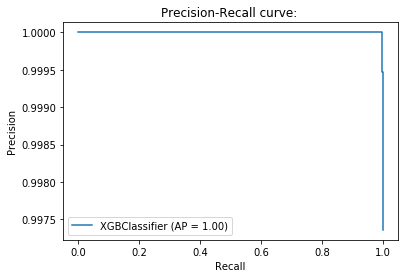

In [28]:
#Precision recall curve plotting by importing "plot_precision_recall_curve" library from sklearn

from sklearn.metrics import plot_precision_recall_curve

pr = plot_precision_recall_curve(gbm, X_test, y_test)
pr.ax_.set_title('Precision-Recall curve: '.format(avg_precision))

## Plotting ROC AUC curve

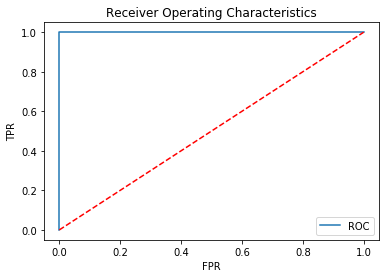

In [29]:
# calculate the fpr and tpr of the classification

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
prob = model.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = 'ROC')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()